# Exam 30th of May 2022
## MVE441 - Statistical Learning for Big Data
### Gabriel Aspegrén

### Question 1
### a) Classificatin

In [2910]:
import matplotlib.pyplot as plt
import numpy as np
import random
#import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
#from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

from sklearn import feature_selection,linear_model,model_selection,metrics

In [4331]:
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)

Text(0.5, 1.0, 'Dog')

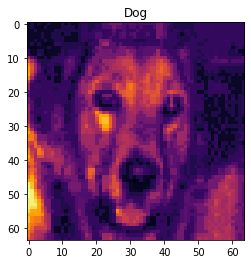

In [2395]:
i = np.random.randint(1,198)
plt.imshow(np.rot90(np.reshape(np.array(CnD.loc[114,:]),(64,64)),3), cmap='inferno')
if dataset.loc[114][4096] == 0:
    title = 'Cat'
else:
    title = 'Dog'
    
plt.title(title)

Text(0.5, 1.0, '1')

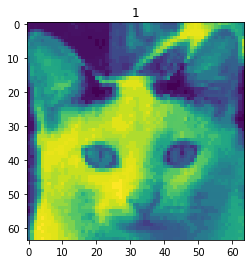

In [2402]:
i = 8
plt.imshow(np.rot90(np.reshape(np.array(CnD.loc[i,:]),(64,64)),3))
plt.title(dataset.loc[i][4096])

#### Functions

In [4282]:
def kNN_accuracy(n_samples, n_neighbors,n_repetitions,dataset):
    accuracy = np.zeros((1))
    seed = 1
    wrong_pred = []
    right_pred = []
    for i in range(n_repetitions):
        random.seed(seed)
        rand_idx = random.sample(range(0, len(dataset)), n_samples)
        train_idx, test_idx = train_test_split(rand_idx, test_size=0.20)
        # Create x and y data
        X_train = dataset.iloc[train_idx, :-1].values
        y_train = dataset.iloc[train_idx,4096].values
        X_test = dataset.iloc[test_idx, :-1].values
        y_test = dataset.iloc[test_idx,4096].values

        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        # Train the data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        classifier = KNeighborsClassifier(n_neighbors)
        classifier.fit(X_train, y_train)
        # Predict the data
        y_pred = classifier.predict(X_test)
        seed += 1

        for i in range(len(y_pred)):

            if y_pred[i] == y_test[i]:

                right_pred.append(test_idx[i])
            else:

                wrong_pred.append(test_idx[i])
        accuracy += accuracy_score(y_test, y_pred)
    # Print result

    print("kNN average accuracy score" , accuracy/n_repetitions)
    return wrong_pred


In [4256]:
def train_kNN_accuracy(n_samples, n_neighbors,n_repetitions,dataset):
    accuracy = np.zeros((1))
    seed = 1
    wrong_pred = []
    right_pred = []
    for i in range(n_repetitions):
        random.seed(seed)
        rand_idx = random.sample(range(0, 198), n_samples)
        train_idx, test_idx = train_test_split(rand_idx, test_size=0.20)
        # Create x and y data
        X_train = dataset.iloc[train_idx, :-1].values
        y_train = dataset.iloc[train_idx,4096].values
        X_test = dataset.iloc[test_idx, :-1].values
        y_test = dataset.iloc[test_idx,4096].values

        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        # Train the data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        classifier = KNeighborsClassifier(n_neighbors)
        classifier.fit(X_train, y_train)
        # Predict the data
        y_pred = classifier.predict(X_test)
        seed += 1

        for i in range(len(y_pred)):

            if y_pred[i] == y_test[i]:

                right_pred.append(test_idx[i])
            else:

                wrong_pred.append(test_idx[i])
        accuracy += accuracy_score(y_test, y_pred)
    # Print result

    print("kNN average accuracy score" , accuracy/n_repetitions)
    return wrong_pred, X_train,X_test,y_train,y_test


In [2909]:
def LDA_accuracy(n_samples,n_repetitions,dataset):
    wrong_pred_LDA = []
    right_pred_LDA = []
    accuracy = np.zeros((1))
    seed = 1
    for i in range(n_repetitions):


        lda = LDA(n_components=1)
        X_train = lda.fit_transform(X_train, y_train)
        X_test = lda.transform(X_test)

        classifier = RandomForestClassifier(max_depth=2, random_state=0)

        classifier.fit(X_train, y_train)

        # Predict the data
        y_pred = classifier.predict(X_test)

        seed += 1

        counter = np.zeros((len(X_test),2))
        for i in range(len(y_pred)):
            counter[i][0] = test_idx[i]
            if y_pred[i] == y_test[i]:
                counter[i][1] += 0
                right_pred_LDA.append(test_idx[i])
            else:
                counter[i][1] += 1
                wrong_pred_LDA.append(test_idx[i])
        accuracy += accuracy_score(y_test, y_pred)

    print('LDA average accuracy score ' ,accuracy/n_repetitions)
    return wrong_pred_LDA

In [2442]:
def plot_most_misclassified(wrong_pred,dataset):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))
    fig.suptitle('Nine most occurrent misclassifications')
    ax1.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[0][0],:][:-1]),(64,64)),3))
    ax1.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[0][1]}')
    ax2.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[1][0],:][:-1]),(64,64)),3))
    ax2.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[1][1]}')
    ax3.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[2][0],:][:-1]),(64,64)),3))
    ax3.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[2][1]}')
    ax4.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[3][0],:][:-1]),(64,64)),3))
    ax4.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[3][1]}')
    ax5.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[4][0],:][:-1]),(64,64)),3))
    ax5.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[4][1]}')
    ax6.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[5][0],:][:-1]),(64,64)),3))
    ax6.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[5][1]}')
    ax7.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[6][0],:][:-1]),(64,64)),3))
    ax7.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[6][1]}')
    ax8.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[7][0],:][:-1]),(64,64)),3))
    ax8.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[7][1]}')
    ax9.imshow(np.rot90(np.reshape(np.array(dataset.loc[Counter(wrong_pred).most_common(10)[8][0],:][:-1]),(64,64)),3))
    ax9.set_title('Count: '+f'{Counter(wrong_pred).most_common(10)[8][1]}')
    return

### k-nearest neighbors

In [3365]:
n_samples = 100
sub_samples = int(n_samples/2)
n_neighbors = 5
n_repetitions = 80

wrong_pred_kNN = []
right_pred_kNN = []
accuracy = np.zeros((1))
seed = 1
for i in range(n_repetitions):
    random.seed(seed)
    rand_idx_cat = random.sample(range(0, 99), sub_samples)
    rand_idx_dog = random.sample(range(100,198), sub_samples)
    rand_idx = rand_idx_cat + rand_idx_dog
    train_idx, test_idx = train_test_split(rand_idx, test_size=0.2)
    # Create x and y data
    X_train = dataset.iloc[train_idx, :-1].values
    y_train = dataset.iloc[train_idx,4096].values
    X_test = dataset.iloc[test_idx, :-1].values
    y_test = dataset.iloc[test_idx,4096].values

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    # Train the data
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    classifier = KNeighborsClassifier(n_neighbors)
    classifier.fit(X_train, y_train)
    # Predict the data
    y_pred = classifier.predict(X_test)
    seed += 1

    for i in range(len(y_pred)):

        if y_pred[i] == y_test[i]:

            right_pred_kNN.append(test_idx[i])
        else:

            wrong_pred_kNN.append(test_idx[i])
    accuracy += accuracy_score(y_test, y_pred)
# Print result

print("Average accuracy score" , accuracy/n_repetitions)

Average accuracy score [0.739375]


### Decision trees

In [3366]:
wrong_pred_DT = []
right_pred_DT = []
accuracy = np.zeros((1))
seed = 1
for i in range(n_repetitions):
    random.seed(seed)
    rand_idx_cat = random.sample(range(0, 99), sub_samples)
    rand_idx_dog = random.sample(range(100,198), sub_samples)
    rand_idx = rand_idx_cat + rand_idx_dog
    train_idx, test_idx = train_test_split(rand_idx, test_size=0.2)
    # Create x and y data
    X_train = dataset.iloc[train_idx, :-1].values
    y_train = dataset.iloc[train_idx,4096].values
    X_test = dataset.iloc[test_idx, :-1].values
    y_test = dataset.iloc[test_idx,4096].values

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    # Train the data
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    seed += 1
    
    counter = np.zeros((len(X_test),2))
    for i in range(len(y_pred)):
        counter[i][0] = test_idx[i]
        if y_pred[i] == y_test[i]:
            counter[i][1] += 0
            right_pred_DT.append(test_idx[i])
        else:
            counter[i][1] += 1
            wrong_pred_DT.append(test_idx[i])
    accuracy += accuracy_score(y_test, y_pred)
# Print result

print("Average accuracy score" , accuracy/n_repetitions)

Average accuracy score [0.624375]


### LDA

In [3367]:
wrong_pred_LDA = []
right_pred_LDA = []
accuracy = np.zeros((1))
seed = 1
for i in range(n_repetitions):
    random.seed(seed)
    rand_idx_cat = random.sample(range(0, 99), sub_samples)
    rand_idx_dog = random.sample(range(100,198), sub_samples)
    rand_idx = rand_idx_cat + rand_idx_dog
    train_idx, test_idx = train_test_split(rand_idx, test_size=0.2)
    # Create x and y data
    X_train = dataset.iloc[train_idx, :-1].values
    y_train = dataset.iloc[train_idx,4096].values
    X_test = dataset.iloc[test_idx, :-1].values
    y_test = dataset.iloc[test_idx,4096].values

    lda = LDA(n_components=1)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)

    classifier = RandomForestClassifier(max_depth=2, random_state=0)

    classifier.fit(X_train, y_train)

    # Predict the data
    y_pred = classifier.predict(X_test)
    
    seed += 1
    
    counter = np.zeros((len(X_test),2))
    for i in range(len(y_pred)):
        counter[i][0] = test_idx[i]
        if y_pred[i] == y_test[i]:
            counter[i][1] += 0
            right_pred_LDA.append(test_idx[i])
        else:
            counter[i][1] += 1
            wrong_pred_LDA.append(test_idx[i])
    accuracy += accuracy_score(y_test, y_pred)
# Print result

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
#print(cm)
print('Average accuracy score ' ,accuracy/n_repetitions)

Average accuracy score  [0.728125]


### Naive Bayes

In [3320]:
from sklearn.naive_bayes import GaussianNB
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)
seed = 1
accuracy = 0
for i in range(n_repetitions):
    
    random.seed(seed)
    rand_idx = random.sample(range(0, 198), n_samples)
    train_idx, test_idx = train_test_split(rand_idx, test_size=0.20)
    # Create x and y data
    X_train = dataset.iloc[train_idx, :-1].values
    y_train = dataset.iloc[train_idx,4096].values
    X_test = dataset.iloc[test_idx, :-1].values
    y_test = dataset.iloc[test_idx,4096].values
    Naive_Bayes = GaussianNB()
    Naive_Bayes.fit(X_train, y_train)
    prediction_results = Naive_Bayes.predict(X_test) 
    accuracy += accuracy_score(y_test,prediction_results)
    seed +=1
#print(prediction_results)
print('Average accuracy score ' ,accuracy/n_repetitions)

Average accuracy score  0.705


Visualizing the three most misslabeled images per model and their respective count

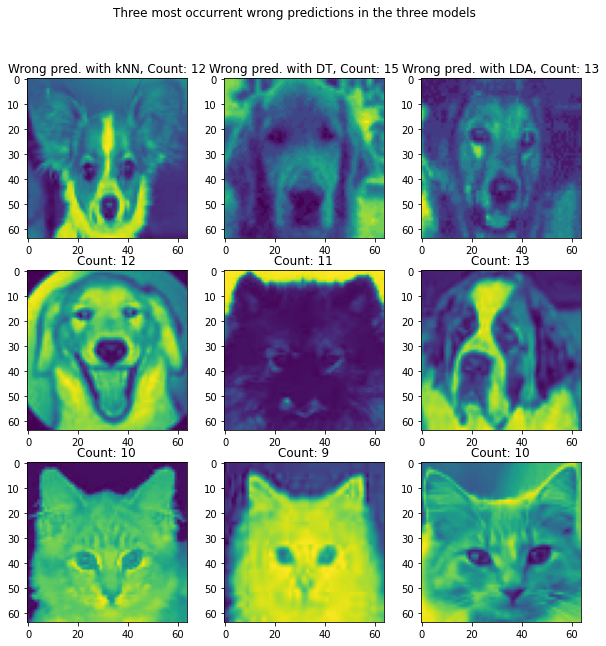

kNN: Mislabeled cats:  0.34
kNN: Mislabeled dogs:  0.66
DT: Mislabeled cats:  0.49
DT: Mislabeled dogs:  0.51
LDA: Mislabeled cats:  0.49
LDA: Mislabeled dogs:  0.51


In [3368]:
fig, ((ax1, ax4, ax7), (ax2, ax5, ax8), (ax3, ax6, ax9)) = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle('Three most occurrent wrong predictions in the three models')
ax1.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_kNN).most_common(10)[0][0],:]),(64,64)),3))
ax1.set_title('Wrong pred. with kNN, Count: '+f'{Counter(wrong_pred_kNN).most_common(10)[0][1]}')
ax2.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_kNN).most_common(10)[1][0],:]),(64,64)),3))
ax2.set_title('Count: '+f'{Counter(wrong_pred_kNN).most_common(10)[1][1]}')
ax3.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_kNN).most_common(10)[2][0],:]),(64,64)),3))
ax3.set_title('Count: '+f'{Counter(wrong_pred_kNN).most_common(10)[2][1]}')
ax4.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_DT).most_common(10)[0][0],:]),(64,64)),3))
ax4.set_title('Wrong pred. with DT, Count: '+f'{Counter(wrong_pred_DT).most_common(10)[0][1]}')
ax5.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_DT).most_common(10)[1][0],:]),(64,64)),3))
ax5.set_title('Count: '+f'{Counter(wrong_pred_DT).most_common(10)[1][1]}')
ax6.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_DT).most_common(10)[2][0],:]),(64,64)),3))
ax6.set_title('Count: '+f'{Counter(wrong_pred_DT).most_common(10)[2][1]}')
ax7.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_LDA).most_common(10)[0][0],:]),(64,64)),3))
ax7.set_title('Wrong pred. with LDA, Count: '+f'{Counter(wrong_pred_LDA).most_common(10)[0][1]}')
ax8.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_LDA).most_common(10)[1][0],:]),(64,64)),3))
ax8.set_title('Count: '+f'{Counter(wrong_pred_LDA).most_common(10)[1][1]}')
ax9.imshow(np.rot90(np.reshape(np.array(CnD.loc[Counter(wrong_pred_LDA).most_common(10)[2][0],:]),(64,64)),3))
ax9.set_title('Count: '+f'{Counter(wrong_pred_LDA).most_common(10)[2][1]}')
plt.show()

dog_count_kNN = 0
dog_count_DT = 0
dog_count_LDA = 0
for i in range(len(wrong_pred_kNN)):
    if dataset.iloc[wrong_pred_kNN[i]][4096] == 1:
        dog_count_kNN += 1
cat_count_kNN = len(wrong_pred_kNN) - dog_count_kNN
for i in range(len(wrong_pred_DT)):
    if dataset.iloc[wrong_pred_DT[i]][4096] == 1:
        dog_count_DT += 1
cat_count_DT = len(wrong_pred_DT) - dog_count_DT
for i in range(len(wrong_pred_LDA)):
    if dataset.iloc[wrong_pred_LDA[i]][4096] == 1:
        dog_count_LDA += 1
cat_count_LDA = len(wrong_pred_LDA) - dog_count_LDA
print('kNN: Mislabeled cats: ', round((cat_count_kNN/(cat_count_kNN+dog_count_kNN)),2))
print('kNN: Mislabeled dogs: ', round((dog_count_kNN/(cat_count_kNN+dog_count_kNN)),2))
print('DT: Mislabeled cats: ', round((cat_count_DT/(cat_count_DT+dog_count_DT)),2))
print('DT: Mislabeled dogs: ', round((dog_count_DT/(cat_count_DT+dog_count_DT)),2))
print('LDA: Mislabeled cats: ', round((cat_count_LDA/(cat_count_LDA+dog_count_LDA)),2))
print('LDA: Mislabeled dogs: ', round((dog_count_LDA/(cat_count_LDA+dog_count_LDA)),2))

### b) Feature importance

### Linear regression

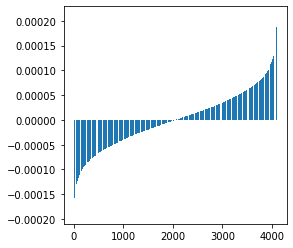

In [4325]:
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,4096].values
# define the model
importance = 0
for i in range(n_repetitions):
    model = LinearRegression()
    model.fit(X, y)
    importance += model.coef_
importance = importance/n_repetitions
plt.bar([x for x in range(len(importance))], np.sort(importance))
plt.show()
important_features_LinReg = pd.DataFrame(data=importance,columns=['importance'])

### Logistic regression

C:\Users\gabri\anaconda3\envs\simcom\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gabri\anaconda3\envs\simcom\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

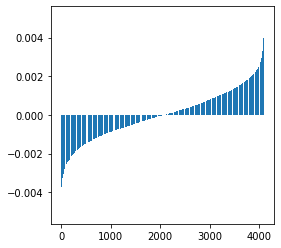

In [1844]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,4096].values
importance = 0
for i in range(n_repetitions):
    model = LogisticRegression()
    model.fit(X, y)
    importance += model.coef_[0]
importance = importance/n_repetitions
plt.bar([x for x in range(len(importance))], np.sort(importance))
plt.show()

important_features_LogReg = pd.DataFrame(data=importance,columns=['importance'])

### Random Forest

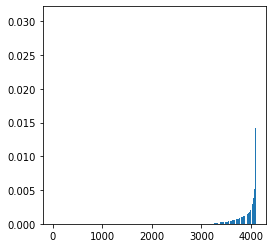

In [4326]:
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,4096].values
importance = 0
for i in range(1):
    model = RandomForestRegressor()
    model.fit(X, y)
    importance += model.feature_importances_
importance = importance
sort_importance = np.sort(importance)
plt.bar([x for x in range(len(sort_importance))], sort_importance)
plt.show()

important_features_RanFor = pd.DataFrame(data=importance,columns=['importance'])

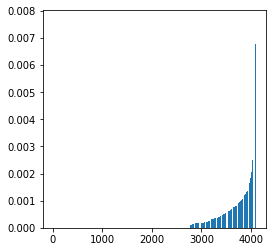

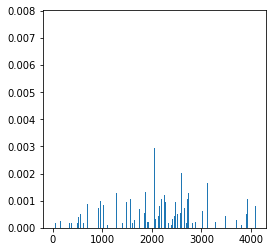

In [4327]:
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,4096].values
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

sort_importance = np.sort(importance)
plt.bar([x for x in range(len(sort_importance))], sort_importance)
plt.show()
plt.bar([x for x in range(len(importance))], importance)
plt.show()
important_features_RanFor = pd.DataFrame(data=importance,columns=['importance'])

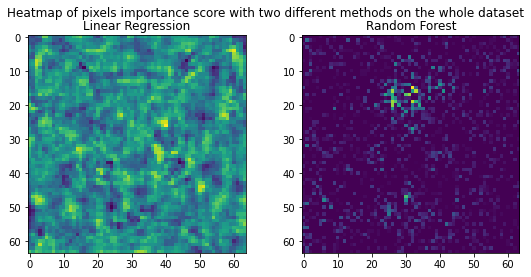

In [4330]:
#for i in range(len(important_features_LinReg)):
#    if important_features_LinReg.iloc[i][0] < 0:
#        important_features_LinReg = important_features_LinReg.replace(important_features_LinReg.iloc[i][0], value=0)
#    if important_features_LogReg.iloc[i][0] < 0:
#        important_features_LogReg = important_features_LogReg.replace(important_features_LogReg.iloc[i][0], value=0)

best_idx_LinReg = important_features_LinReg.sort_values(by='importance', ascending=False).index
best_idx_LogReg = important_features_LogReg.sort_values(by='importance', ascending=False).index
best_idx_RanFor = important_features_RanFor.sort_values(by='importance', ascending=False).index
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
for i in range(0,30):
    x1.append(best_idx_LinReg[i] % 64)
    y1.append((best_idx_LinReg[i] - best_idx_LinReg[i] % 64)/64)
    x2.append(best_idx_LogReg[i] % 64)
    y2.append((best_idx_LogReg[i] - best_idx_LogReg[i] % 64)/64)
    x3.append(best_idx_RanFor[i] % 64)
    y3.append((best_idx_RanFor[i] - best_idx_RanFor[i] % 64)/64)
    
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(9,4))
plt.gca().invert_xaxis()
fig.suptitle('Heatmap of pixels importance score with two different methods on the whole dataset')

#ax1.scatter(x1,y1,marker=",", color='b')
#ax1.set_title('Linear Regression')
#ax2.scatter(x2,y2,marker=",", color='r')
#ax2.set_title('Logistic Regression')
#ax3.scatter(x3,y3,marker=",",color='g')
#ax3.set_title('Random Forest')


ax1.imshow(np.rot90(np.reshape(np.array(important_features_LinReg),(64,64)),3))
ax1.set_title('Linear Regression')
ax3.imshow(np.rot90(np.reshape(np.array(important_features_LogReg),(64,64)),3))
ax3.set_title('Logistic Regression')
ax2.imshow(np.rot90(np.reshape(np.array(important_features_RanFor),(64,64)),3))
ax2.set_title('Random Forest')
plt.show()
#plt.rcParams["figure.figsize"] = (4,4)
#plt.scatter(x,y,marker=",")

### c) Clustering

In [4307]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

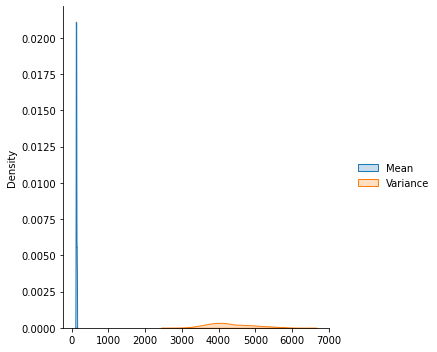

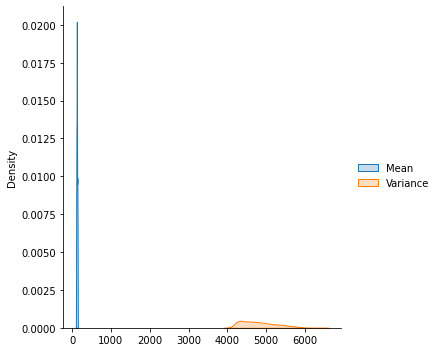

In [4308]:
scaler = StandardScaler()
dfScaledData = pd.DataFrame(scaler.fit_transform(CnD),columns = CnD.columns)
sns.displot(pd.DataFrame({'Mean': CnD.mean(), 'Variance': CnD.var()}), kind="kde", fill=True)

varFilteredData=CnD[CnD.var().sort_values()[2000:4096].index]
sns.displot(pd.DataFrame({'Mean': varFilteredData.mean(), 'Variance': varFilteredData.var()}), kind="kde", fill=True)
dfFilterAndScale = pd.DataFrame(scaler.fit_transform(varFilteredData),columns = varFilteredData.columns)

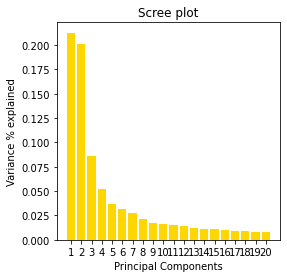

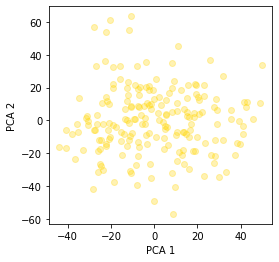

In [4309]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(dfFilterAndScale)

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance % explained')
plt.title('Scree plot')
plt.xticks(PC)
plt.show()

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Number of correctly clustered images  124


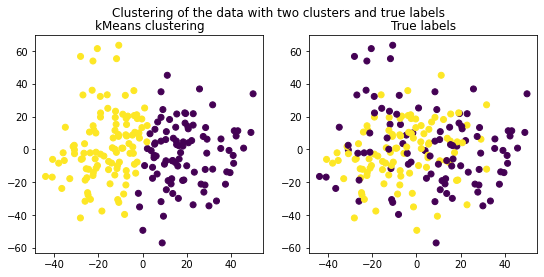

In [4323]:
model = KMeans(n_clusters=2)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
labels_true = pd.read_csv('Labels.csv')
labels_true = labels_true['x'].tolist()

right_cluster = 0
for i in range(len(labels)):
    if labels[i] == labels_true[i]:
        right_cluster += 1
        
print('Number of correctly clustered images ', right_cluster)

fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(9,4))
fig.suptitle('Clustering of the data with two clusters and true labels')
ax1.scatter(PCA_components[0], PCA_components[1], c=labels)
ax1.set_title('kMeans clustering')
ax2.scatter(PCA_components[0], PCA_components[1], c=labels_true)
ax2.set_title('True labels')
plt.show()

In [3835]:
CnD = pd.read_csv("CATSnDOGS.csv")
CnD_sum = pd.DataFrame(data=CnD.iloc[:,:].sum(axis=1), columns=['sum'])


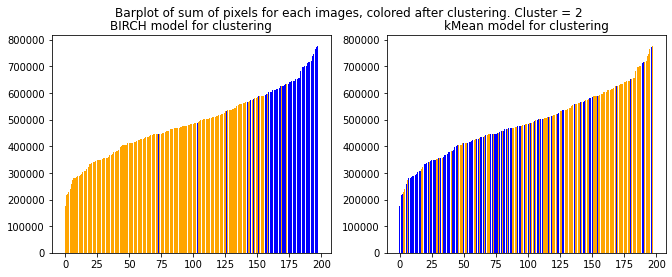

In [3889]:
color = []
for i in range(0,len(yhat)):
    if yhat[i] == 0:
        color.append('orange')
    if yhat[i] == 1:
        color.append('blue')
    if yhat[i] == 2:
        color.append('green')
    if yhat[i] == 3:
        color.append('red')
color_birch = pd.DataFrame(data=color, columns=['color'])

color = []
for i in range(0,len(labels)):
    if labels[i] == 0:
        color.append('orange')
    if labels[i] == 1:
        color.append('blue')
    if labels[i] == 2:
        color.append('green')
    if labels[i] == 3:
        color.append('red')
color_kmean = pd.DataFrame(data=color, columns=['color'])

sum_dataset_birch = pd.concat([CnD_sum, color_birch], axis=1)
sum_dataset_kmean = pd.concat([CnD_sum, color_kmean], axis=1)
sum_birch = sum_dataset_birch.sort_values(by='sum')
sum_kmean = sum_dataset_kmean.sort_values(by='sum')
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(11,4))
fig.suptitle('Barplot of sum of pixels for each images, colored after clustering. Cluster = 2')
ax1.bar(range(0,198),np.copy(sum_birch['sum'][:][:]), color=np.copy(sum_birch['color'][:][:]))
ax1.set_title('BIRCH model for clustering')
ax2.bar(range(0,198),np.copy(sum_kmean['sum'][:][:]), color=np.copy(sum_kmean['color'][:][:]))
ax2.set_title('kMean model for clustering')
plt.show()

Text(0.5, 1.0, 'Dog')

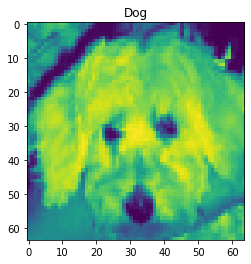

In [3712]:
i = np.random.randint(1,198)
plt.imshow(np.rot90(np.reshape(np.array(CnD.loc[i,:]),(64,64)),3))
if dataset.iloc[i,4096] == 0:
    title = 'Cat'
else:
    title = 'Dog'
    
plt.title(title)

Number of correctly clustered images  68


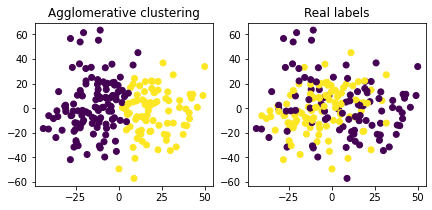

In [3842]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(PCA_components.iloc[:,:2])
labels = model.labels_

right_cluster = 0
for i in range(len(labels)):
    if labels[i] == labels_true[i]:
        right_cluster += 1
print('Number of correctly clustered images ', right_cluster)

fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(7,3))
ax1.scatter(PCA_components[0], PCA_components[1], c=labels)
ax1.set_title('Agglomerative clustering')
ax2.scatter(PCA_components[0], PCA_components[1], c=labels_true)
ax2.set_title('Real labels')
plt.show()


C:\Users\gabri\anaconda3\envs\simcom\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Number of correctly clustered images  102


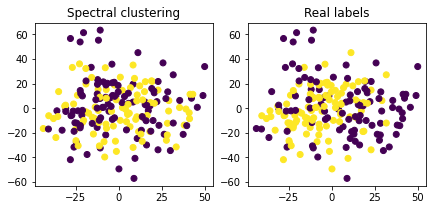

In [3844]:
X = dataset.iloc[:, :-1].values
clustering = SpectralClustering(n_clusters=2).fit(X)
clustering.labels_

right_cluster = 0
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] == labels_true[i]:
        right_cluster += 1
print('Number of correctly clustered images ', right_cluster)

fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(7,3))
ax1.scatter(PCA_components[0], PCA_components[1], c=clustering.labels_)
ax1.set_title('Spectral clustering')
ax2.scatter(PCA_components[0], PCA_components[1], c=labels_true)
ax2.set_title('Real labels')
plt.show()

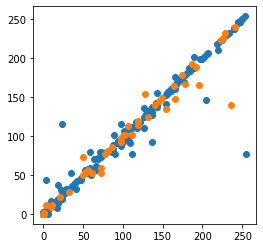

Number of correctly clustered images  109


In [3901]:
from sklearn.cluster import Birch

X = dataset.iloc[:, :-1].values
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

right_cluster = 0
for i in range(len(clustering.labels_)):
    if yhat[i] == labels_true[i]:
        right_cluster += 1
print('Number of correctly clustered images ', right_cluster)


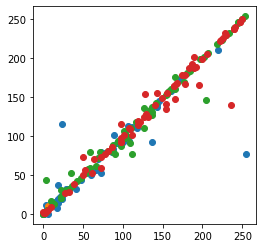

In [4120]:
from sklearn.cluster import AffinityPropagation
X = dataset.iloc[:, :-1].values
model = AffinityPropagation(damping=0.98)

model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

### d) Clustering cats and dogs

In [4077]:
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)
dogs, cats = dataset[(mask:=dataset['x'] >= 1)], dataset[~mask]

In [4079]:
scaler = StandardScaler()
CatsScaledData = pd.DataFrame(scaler.fit_transform(cats),columns = cats.columns)
DogsScaledData = pd.DataFrame(scaler.fit_transform(dogs),columns = dogs.columns)
#sns.displot(pd.DataFrame({'Mean': cats.mean(), 'Variance': cats.var()}), kind="kde", fill=True)

varFilteredDataCats=cats[cats.var().sort_values()[0:4096].index]
varFilteredDataDogs=dogs[dogs.var().sort_values()[0:4096].index]
#sns.displot(pd.DataFrame({'Mean': varFilteredDataCats.mean(), 'Variance': varFilteredDataCats.var()}), kind="kde", fill=True)
CatsFilterAndScale = pd.DataFrame(scaler.fit_transform(varFilteredDataCats),columns = varFilteredDataCats.columns)
DogsFilterAndScale = pd.DataFrame(scaler.fit_transform(varFilteredDataDogs),columns = varFilteredDataDogs.columns)

In [4085]:
pca = PCA(n_components=20)
principalComponentsCats = pca.fit_transform(CatsScaledData)
principalComponentsDogs = pca.fit_transform(DogsScaledData)

# Putting components in a dataframe for later
PCA_components_Cats = pd.DataFrame(principalComponentsCats)
PCA_components_Dogs = pd.DataFrame(principalComponentsDogs)


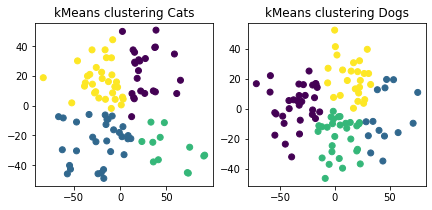

In [4264]:
model = KMeans(n_clusters=4)
# Cats
model.fit(PCA_components_Cats.iloc[:,:2])
labels_cats_kmeans = model.predict(PCA_components_Cats.iloc[:,:2])

fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(7,3))

ax1.scatter(PCA_components_Cats[0], PCA_components_Cats[1], c=labels_cats_kmeans)
ax1.set_title('kMeans clustering Cats')

# Dogs
model.fit(PCA_components_Dogs.iloc[:,:2])
labels_dogs_kmeans = model.predict(PCA_components_Dogs.iloc[:,:2])

ax2.scatter(PCA_components_Dogs[0], PCA_components_Dogs[1], c=labels_dogs_kmeans)
ax2.set_title('kMeans clustering Dogs')
plt.show()

In [4265]:
label_c_kmeans = pd.DataFrame(data=labels_cats_kmeans, columns=['x'])
label_d_kmeans = pd.DataFrame(data=labels_dogs_kmeans, columns=['x'])
cats['x'] = label_c_kmeans['x'].values
dogs['x'] = label_d_kmeans['x'].values

C:\Users\gabri\AppData\Local\Temp/ipykernel_16736/1949335114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats['x'] = label_c_kmeans['x'].values
C:\Users\gabri\AppData\Local\Temp/ipykernel_16736/1949335114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs['x'] = label_d_kmeans['x'].values


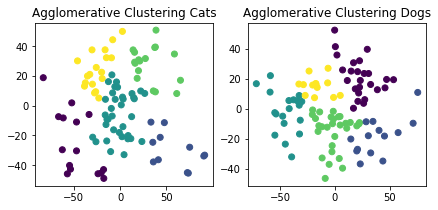

In [4105]:
model = AgglomerativeClustering(n_clusters=5)

# Cats
model.fit(PCA_components_Cats.iloc[:,:2])
labels_cats_agglo = model.labels_

fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(7,3))
ax1.scatter(PCA_components_Cats[0], PCA_components_Cats[1], c=labels_cats_agglo)
ax1.set_title('Agglomerative Clustering Cats')

# Dogs
model.fit(PCA_components_Dogs.iloc[:,:2])
labels_dogs_agglo = model.labels_

ax2.scatter(PCA_components_Dogs[0], PCA_components_Dogs[1], c=labels_dogs_agglo)
ax2.set_title('Agglomerative Clustering Dogs')
plt.show()

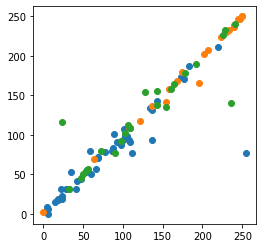

In [4143]:
X = cats.iloc[:, :-1].values
model = Birch(threshold=0.01, n_clusters=3)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()



55


Text(0.5, 1.0, '1')

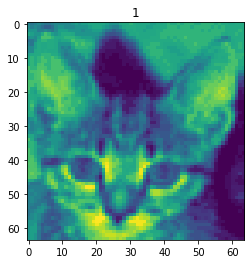

In [4181]:
i = np.random.randint(0,len(cats))
print(i)
plt.imshow(np.rot90(np.reshape(np.array(cats.iloc[i,:][:-1]),(64,64)),3))
title = cats.iloc[i,:][4096]
plt.title(title)

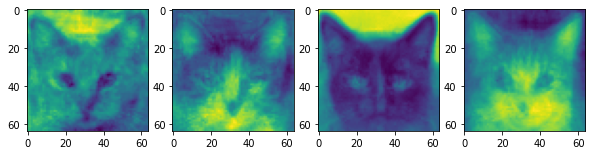

In [4241]:
#cats_0_df = cats[cats['x'] == 0]
cats_0_sum = np.copy(cats[cats['x'] == 0].sum())
cats_0_sum/(len(cats[cats['x'] == 0]))

#cats_1_df = cats[cats['x'] == 1]
cats_1_sum = np.copy(cats[cats['x'] == 1].sum())
cats_1_sum/(len(cats[cats['x'] == 1]))

#cats_2_df = cats[cats['x'] == 2]
cats_2_sum = np.copy(cats[cats['x'] == 2].sum())
cats_2_sum/(len(cats[cats['x'] == 2]))

cats_3_sum = np.copy(cats[cats['x'] == 3].sum())
cats_3_sum/(len(cats[cats['x'] == 3]))

fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,figsize=(10,10))
ax1.imshow(np.rot90(np.reshape(cats_0_sum[:-1],(64,64)),3))
ax2.imshow(np.rot90(np.reshape(cats_1_sum[:-1],(64,64)),3))
ax3.imshow(np.rot90(np.reshape(cats_2_sum[:-1],(64,64)),3))
ax4.imshow(np.rot90(np.reshape(cats_3_sum[:-1],(64,64)),3))

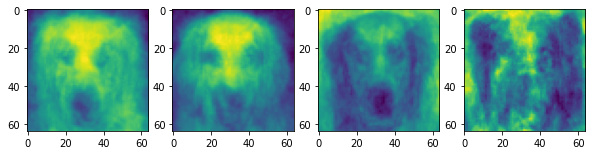

In [4242]:
#cats_0_df = cats[cats['x'] == 0]
dogs_0_sum = np.copy(dogs[dogs['x'] == 0].sum())
dogs_0_sum/(len(dogs[dogs['x'] == 0]))

#cats_1_df = cats[cats['x'] == 1]
dogs_1_sum = np.copy(dogs[dogs['x'] == 1].sum())
dogs_1_sum/(len(dogs[dogs['x'] == 1]))

#cats_2_df = cats[cats['x'] == 2]
dogs_2_sum = np.copy(dogs[dogs['x'] == 2].sum())
dogs_2_sum/(len(dogs[dogs['x'] == 2]))

dogs_3_sum = np.copy(dogs[dogs['x'] == 3].sum())
dogs_3_sum/(len(dogs[dogs['x'] == 3]))

fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,figsize=(10,10))
ax1.imshow(np.rot90(np.reshape(dogs_0_sum[:-1],(64,64)),3))
ax2.imshow(np.rot90(np.reshape(dogs_1_sum[:-1],(64,64)),3))
ax3.imshow(np.rot90(np.reshape(dogs_2_sum[:-1],(64,64)),3))
ax4.imshow(np.rot90(np.reshape(dogs_3_sum[:-1],(64,64)),3))

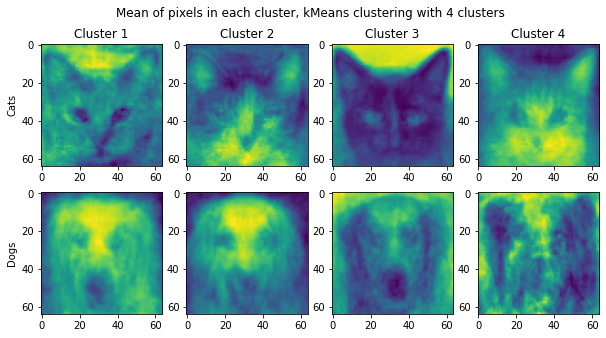

In [4243]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(10,5))
fig.suptitle('Mean of pixels in each cluster, kMeans clustering with 4 clusters')
ax1.imshow(np.rot90(np.reshape(cats_0_sum[:-1],(64,64)),3))
ax1.set_title('Cluster 1')
ax1.set_ylabel('Cats')
ax2.imshow(np.rot90(np.reshape(cats_1_sum[:-1],(64,64)),3))
ax2.set_title('Cluster 2')
ax3.imshow(np.rot90(np.reshape(cats_2_sum[:-1],(64,64)),3))
ax3.set_title('Cluster 3')
ax4.imshow(np.rot90(np.reshape(cats_3_sum[:-1],(64,64)),3))
ax4.set_title('Cluster 4')
ax5.imshow(np.rot90(np.reshape(dogs_0_sum[:-1],(64,64)),3))
ax5.set_ylabel('Dogs')
ax6.imshow(np.rot90(np.reshape(dogs_1_sum[:-1],(64,64)),3))
ax7.imshow(np.rot90(np.reshape(dogs_2_sum[:-1],(64,64)),3))
ax8.imshow(np.rot90(np.reshape(dogs_3_sum[:-1],(64,64)),3))

Text(0.5, 1.0, '3')

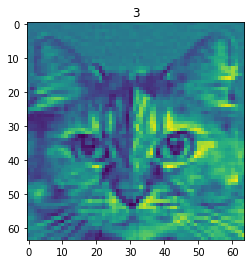

In [4278]:
i = np.random.randint(0,len(cats))
plt.imshow(np.rot90(np.reshape(np.array(cats.iloc[i,:][:-1]),(64,64)),3))
title = cats.iloc[i,:][4096]
plt.title(title)

### e) Classification of cats and dogs separate

In [4304]:
# Accuracy score
wrong_pred_cat = kNN_accuracy(40, 5,50,cats)
wrong_pred_dog = kNN_accuracy(40, 5,50,dogs)

kNN average accuracy score [0.7925]
kNN average accuracy score [0.7525]


C:\Users\gabri\AppData\Local\Temp/ipykernel_16736/1299444247.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(important_features_LinReg_cats.sort_values(by='importance', ascending=True).index)


<function matplotlib.pyplot.show(close=None, block=None)>

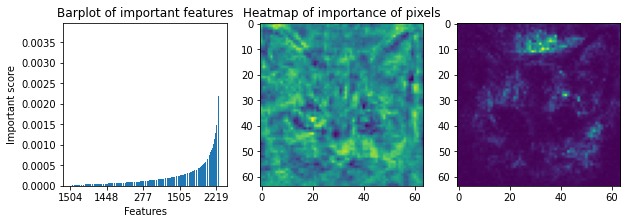

In [4289]:
X = cats.iloc[:, :-1].values
y = cats.iloc[:,4096].values

importance = 0
for i in range(n_repetitions):
    model = LinearRegression()
    model.fit(X, y)
    importance += model.coef_
importance = importance/n_repetitions
important_features_LinReg_cats = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_LinReg_cats.sort_values(by='importance', ascending=False).index

importance = 0
for i in range(n_repetitions):
    model = RandomForestClassifier()
    model.fit(X, y)
    importance += model.feature_importances_

importance = importance/n_repetitions
important_features_RanFor_cats = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_RanFor_cats.sort_values(by='importance', ascending=False).index    
    
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,3))
ax1.bar([x for x in range(len(importance))], np.sort(importance))
ax1.set_xlabel('Features')
ax1.set_ylabel('Important score')
ax1.set_title('Barplot of important features')
ax1.set_xticklabels(important_features_LinReg_cats.sort_values(by='importance', ascending=True).index)
ax2.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_cats),(64,64)),3))
ax2.set_title('Heatmap of importance of pixels')
ax3.imshow(np.rot90(np.reshape(np.array(important_features_RanFor_cats),(64,64)),3))
plt.show

C:\Users\gabri\AppData\Local\Temp/ipykernel_16736/4118601704.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(important_features_LinReg_dogs.sort_values(by='importance', ascending=True).index)


<function matplotlib.pyplot.show(close=None, block=None)>

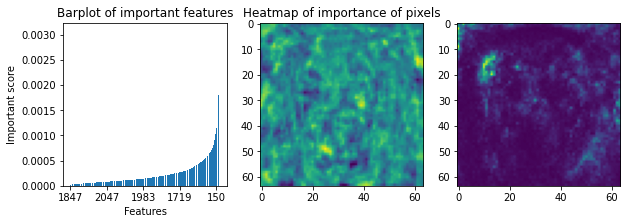

In [4290]:
X = dogs.iloc[:, :-1].values
y = dogs.iloc[:,4096].values

importance = 0
for i in range(n_repetitions):
    model = LinearRegression()
    model.fit(X, y)
    importance += model.coef_
importance = importance/n_repetitions
important_features_LinReg_dogs = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_LinReg_dogs.sort_values(by='importance', ascending=False).index

importance = 0
for i in range(n_repetitions):
    model = RandomForestClassifier()
    model.fit(X, y)
    importance += model.feature_importances_

importance = importance/n_repetitions
important_features_RanFor_dogs = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_RanFor_dogs.sort_values(by='importance', ascending=False).index    
    
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,3))
ax1.bar([x for x in range(len(importance))], np.sort(importance))
ax1.set_xlabel('Features')
ax1.set_ylabel('Important score')
ax1.set_title('Barplot of important features')
ax1.set_xticklabels(important_features_LinReg_dogs.sort_values(by='importance', ascending=True).index)
ax2.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_dogs),(64,64)),3))
ax2.set_title('Heatmap of importance of pixels')
ax3.imshow(np.rot90(np.reshape(np.array(important_features_RanFor_dogs),(64,64)),3))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

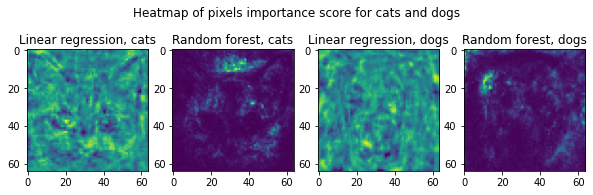

In [4292]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(10,3))
fig.suptitle('Heatmap of pixels importance score for cats and dogs')
ax1.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_cats),(64,64)),3))
ax1.set_title('Linear regression, cats')
ax2.imshow(np.rot90(np.reshape(np.array(important_features_RanFor_cats),(64,64)),3))
ax2.set_title('Random forest, cats')
ax3.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_dogs),(64,64)),3))
ax3.set_title('Linear regression, dogs')
ax4.imshow(np.rot90(np.reshape(np.array(important_features_RanFor_dogs),(64,64)),3))
ax4.set_title('Random forest, dogs')
plt.show

### Question 2
### a) Noise

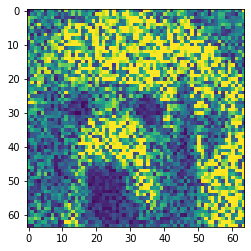

In [4262]:
noise_dataset = np.copy(CnD)
random.seed(a=None)
affected_images = 50
affected_pixels = 4096
lowerUpperBound = 0.8
image_idx = random.sample(range(0, 198), affected_images)
pixel_idx = random.sample(range(0, 4096), affected_pixels)
noise_level = np.random.randint(lower_noise_level,upper_noise_level, (affected_images, affected_pixels))/100

for i in image_idx:
    noise = np.random.uniform(1-lowerUpperBound, 1+lowerUpperBound, 4096)
    noise_dataset[i] = noise_dataset[i]*noise
noise_df = pd.DataFrame(data=noise_dataset)
labels = pd.read_csv("Labels.csv")
noise_df = pd.concat([noise_df, labels], axis=1)
noise_df.clip(0,256, inplace=True)

for i in image_idx[0:1]:
    plt.imshow(np.rot90(np.reshape(np.array(noise_df.loc[i][:-1]),(64,64)),3))
    plt.show()

#### Classification

kNN average accuracy score [0.60125]


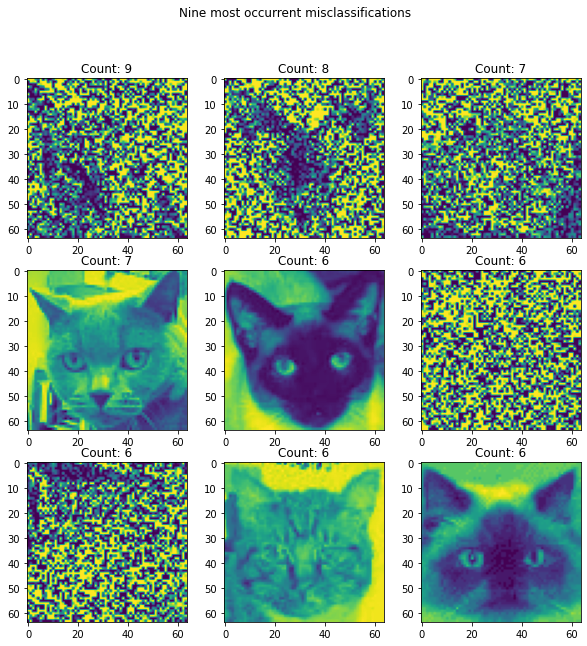

In [4257]:
# Accuracy score
wrong_pred_noise,X_train,X_test,y_train,y_test = train_kNN_accuracy(100, 5,40,noise_df)
# Plot most misclassified
plot_most_misclassified(wrong_pred_noise,noise_df)

In [4252]:
noise_counter = 0
for i in range(len(wrong_pred_noise)):
    for j in range(len(image_idx)):
        if wrong_pred_noise[i] == image_idx[j]:
            noise_counter += 1
print('Percentage of misclassified that is noisy ', noise_counter/len(wrong_pred_noise))

Percentage of misclassified that is noisy  0.597972972972973


In [4258]:
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 0.02868316813342012


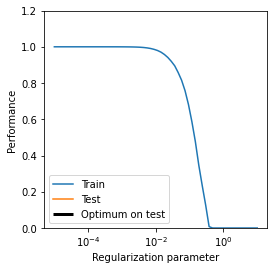

In [4259]:
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,
    label="Optimum on test",
)
plt.legend(loc="lower left")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")
plt.show()

### b) 16 blocks

In [ ]:
# Data processing, replace negative features with zero
for i in range(len(important_features_LinReg)):
    if important_features_LinReg.iloc[i][0] < 0:
        important_features_LinReg = important_features_LinReg.replace(important_features_LinReg.iloc[i][0], value=0)

In [3261]:
features = np.reshape(np.copy(important_features_LinReg), 4096)
dataset = np.copy(CnD)
dataset_features = []
dataset_features.append(dataset)
dataset_features.append(features)

In [3262]:
blocks = []
dataset = np.copy(CnD)
temp_block_importance = np.zeros((16,16))
block_importance = []
for i in range(198):
    for j in range(4):
        for l in range(4):
            block_temp = np.zeros((16,16))
            for k in range(16):
                #temp_row.append(dataset[i][k*64 + j*16*64 + l*16:k*64 +16 + j*16*64 + l*16])
                block_temp[k] = dataset[i][k*64 + j*16*64 + l*16:k*64 +16 + j*16*64 + l*16]
                temp_block_importance[k] = features[k*64 + j*16*64 + l*16:k*64 +16 + j*16*64 + l*16]
            blocks.append(block_temp)
for i in range(16):
    block_importance.append(np.sum(temp_block_importance[i]))

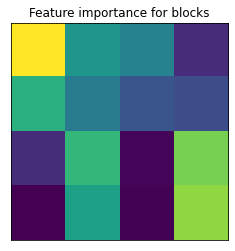

In [3263]:
plt.imshow(np.rot90(np.reshape(block_importance,(4,4)),3))
plt.title('Feature importance for blocks')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

12 8 4 0
13 9 5 1
14 10 6 2
15 11 7 3

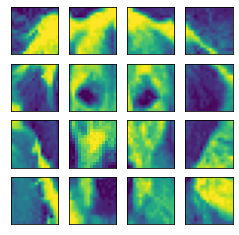

In [3272]:
k = 2

fig, ((ax13, ax9, ax5, ax1), (ax14, ax10, ax6, ax2),(ax15, ax11, ax7, ax3), (ax16, ax12, ax8, ax4)) = plt.subplots(4,4, figsize=(4,4))
fig.suptitle('Picture divided into 16 blocks')
ax1.imshow(np.rot90(np.reshape(blocks[0+16*k],(16,16)),3))
ax2.imshow(np.rot90(np.reshape(blocks[1+16*k],(16,16)),3))
ax3.imshow(np.rot90(np.reshape(blocks[2+16*k],(16,16)),3))
ax4.imshow(np.rot90(np.reshape(blocks[3+16*k],(16,16)),3))
ax5.imshow(np.rot90(np.reshape(blocks[4+16*k],(16,16)),3))
ax6.imshow(np.rot90(np.reshape(blocks[5+16*k],(16,16)),3))
ax7.imshow(np.rot90(np.reshape(blocks[6+16*k],(16,16)),3))
ax8.imshow(np.rot90(np.reshape(blocks[7+16*k],(16,16)),3))
ax9.imshow(np.rot90(np.reshape(blocks[8+16*k],(16,16)),3))
ax10.imshow(np.rot90(np.reshape(blocks[9+16*k],(16,16)),3))
ax11.imshow(np.rot90(np.reshape(blocks[10+16*k],(16,16)),3))
ax12.imshow(np.rot90(np.reshape(blocks[11+16*k],(16,16)),3))
ax13.imshow(np.rot90(np.reshape(blocks[12+16*k],(16,16)),3))
ax14.imshow(np.rot90(np.reshape(blocks[13+16*k],(16,16)),3))
ax15.imshow(np.rot90(np.reshape(blocks[14+16*k],(16,16)),3))
ax16.imshow(np.rot90(np.reshape(blocks[15+16*k],(16,16)),3))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


Average accuracy score [0.66125]
Average accuracy score [0.5475]
Average accuracy score [0.5275]
Average accuracy score [0.5125]
Average accuracy score [0.66]
Average accuracy score [0.65125]
Average accuracy score [0.6625]
Average accuracy score [0.5775]
Average accuracy score [0.68125]
Average accuracy score [0.61625]
Average accuracy score [0.64125]
Average accuracy score [0.58625]
Average accuracy score [0.69125]
Average accuracy score [0.5325]
Average accuracy score [0.49125]
Average accuracy score [0.54625]


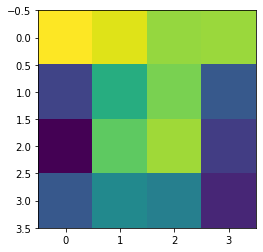

In [3264]:
accuracy_block = []
for k in range(16):
    block_idx = []
    for i in range(198):
        block_idx.append(blocks[k+16*i])
    block_idx_df = pd.DataFrame(data=np.reshape(block_idx,(198,256)))
    labels = pd.read_csv("Labels.csv")
    block_idx_df = pd.concat([block_idx_df, labels],axis=1)

    n_samples = 100
    sub_samples = int(n_samples/2)
    n_neighbors = 5
    n_repetitions = 40

    wrong_pred_kNN = []
    right_pred_kNN = []
    accuracy = np.zeros((1))
    seed = 1
    for i in range(n_repetitions):
        random.seed(seed)
        rand_idx = random.sample(range(0, 198), n_samples)
        train_idx, test_idx = train_test_split(rand_idx, test_size=0.20)
        # Create x and y data
        X_train = block_idx_df.iloc[train_idx, :-1].values
        y_train = block_idx_df.iloc[train_idx,256].values
        X_test = block_idx_df.iloc[test_idx, :-1].values
        y_test = block_idx_df.iloc[test_idx,256].values

        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        # Train the data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        classifier = KNeighborsClassifier(n_neighbors)
        classifier.fit(X_train, y_train)
        # Predict the data
        y_pred = classifier.predict(X_test)
        seed += 1

        for i in range(len(y_pred)):

            if y_pred[i] == y_test[i]:

                right_pred_kNN.append(test_idx[i])
            else:

                wrong_pred_kNN.append(test_idx[i])
        accuracy += accuracy_score(y_test, y_pred)
    # Print result
    accuracy_block.append(accuracy/n_repetitions)
    print("Average accuracy score" , accuracy/n_repetitions)
plt.imshow(np.rot90(np.reshape(accuracy_block,(4,4)),3))

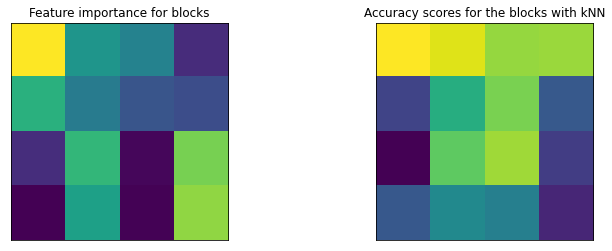

In [3277]:
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(12,4))
ax1.imshow(np.rot90(np.reshape(block_importance,(4,4)),3))
ax1.set_title('Feature importance for blocks')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax2.imshow(np.rot90(np.reshape(accuracy_block,(4,4)),3))
ax2.set_title('Accuracy scores for the blocks with kNN')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

Average accuracy score [0.57875]
Average accuracy score [0.55]
Average accuracy score [0.495]
Average accuracy score [0.54]
Average accuracy score [0.59875]
Average accuracy score [0.5725]
Average accuracy score [0.59625]
Average accuracy score [0.52875]
Average accuracy score [0.5925]
Average accuracy score [0.53125]
Average accuracy score [0.60875]
Average accuracy score [0.51625]
Average accuracy score [0.58]
Average accuracy score [0.54875]
Average accuracy score [0.52875]
Average accuracy score [0.53625]


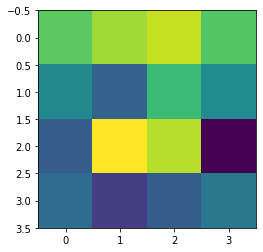

In [3192]:
accuracy_block = []
for k in range(16):
    block_idx = []
    for i in range(198):
        block_idx.append(blocks[k+16*i])
    block_idx_df = pd.DataFrame(data=np.reshape(block_idx,(198,256)))
    labels = pd.read_csv("Labels.csv")
    block_idx_df = pd.concat([block_idx_df, labels],axis=1)

    n_samples = 100
    sub_samples = int(n_samples/2)
    n_neighbors = 5
    n_repetitions = 40

    wrong_pred_kNN = []
    right_pred_kNN = []
    accuracy = np.zeros((1))
    seed = 1
    for i in range(n_repetitions):
        random.seed(seed)
        rand_idx = random.sample(range(0, 198), n_samples)
        train_idx, test_idx = train_test_split(rand_idx, test_size=0.20)
        # Create x and y data
        X_train = block_idx_df.iloc[train_idx, :-1].values
        y_train = block_idx_df.iloc[train_idx,256].values
        X_test = block_idx_df.iloc[test_idx, :-1].values
        y_test = block_idx_df.iloc[test_idx,256].values

        lda = LDA(n_components=1)
        X_train = lda.fit_transform(X_train, y_train)
        X_test = lda.transform(X_test)

        classifier = RandomForestClassifier(max_depth=2, random_state=0)

        classifier.fit(X_train, y_train)

        # Predict the data
        y_pred = classifier.predict(X_test)

        seed += 1

        counter = np.zeros((len(X_test),2))
        for i in range(len(y_pred)):
            counter[i][0] = test_idx[i]
            if y_pred[i] == y_test[i]:
                counter[i][1] += 0
                right_pred_LDA.append(test_idx[i])
            else:
                counter[i][1] += 1
                wrong_pred_LDA.append(test_idx[i])
        accuracy += accuracy_score(y_test, y_pred)
    accuracy_block.append(accuracy/n_repetitions)
    print("Average accuracy score" , accuracy/n_repetitions)
plt.imshow(np.rot90(np.reshape(accuracy_block,(4,4)),3))

### c) Upside down

In [3595]:
upsideDown_data = np.copy(CnD)
affected_images = 99
random.seed(a=None)
image_idx = random.sample(range(0, 198), affected_images)
for i in image_idx:
    upsideDown_data[i] = np.flip(upsideDown_data[i])

upsideDown_data = pd.DataFrame(data=upsideDown_data)
labels = pd.read_csv("Labels.csv")
upsideDown_data = pd.concat([upsideDown_data, labels], axis=1)

kNN average accuracy score [0.5825]


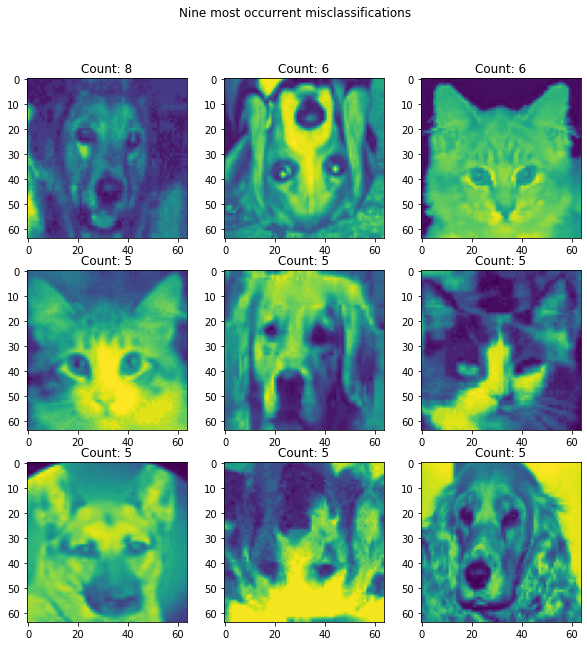

In [3597]:
# Accuracy score
wrong_pred_up = kNN_accuracy(100, 5,40,upsideDown_data)
# Plot most misclassified
plot_most_misclassified(wrong_pred_up,upsideDown_data)

In [3599]:
ud_counter = 0
for i in range(len(wrong_pred_up)):
    for j in range(len(image_idx)):
        if wrong_pred_up[i] == image_idx[j]:
            ud_counter += 1
print('Percentage of misclassified that is noisy ', ud_counter/len(wrong_pred_up))

Percentage of misclassified that is noisy  0.45808383233532934


#### Feature importance

C:\Users\gabri\AppData\Local\Temp/ipykernel_16736/1833705994.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(important_features_LinReg.sort_values(by='importance', ascending=True).index)


<function matplotlib.pyplot.show(close=None, block=None)>

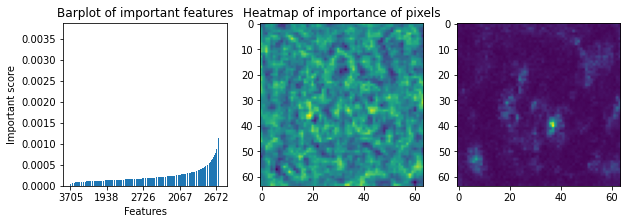

In [3564]:
X = upsideDown_data.iloc[:, :-1].values
y = upsideDown_data.iloc[:,4096].values

importance = 0
for i in range(n_repetitions):
    model = LinearRegression()
    model.fit(X, y)
    importance += model.coef_
importance = importance/n_repetitions
important_features_LinReg = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_LinReg.sort_values(by='importance', ascending=False).index

importance = 0
for i in range(n_repetitions):
    model = RandomForestClassifier()
    model.fit(X, y)
    importance += model.feature_importances_

importance = importance/n_repetitions
important_features_RanFor = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_RanFor.sort_values(by='importance', ascending=False).index    
    



fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,3))
ax1.bar([x for x in range(len(importance))], np.sort(importance))
ax1.set_xlabel('Features')
ax1.set_ylabel('Important score')
ax1.set_title('Barplot of important features')
ax1.set_xticklabels(important_features_LinReg.sort_values(by='importance', ascending=True).index)
ax2.imshow(np.rot90(np.reshape(np.array(important_features_LinReg),(64,64)),3))
ax2.set_title('Heatmap of importance of pixels')
ax3.imshow(np.rot90(np.reshape(np.array(important_features_RanFor),(64,64)),3))
plt.show

In [ ]:
# Data processing, replace negative features with zero
for i in range(len(important_features_LinReg_400)):
    if important_features_LinReg_400.iloc[i][0] < 0:
        important_features_LinReg_400 = important_features_LinReg.replace(important_features_LinReg.iloc[i][0], value=0)

### d) Random noise

kNN average accuracy score [0.7275]


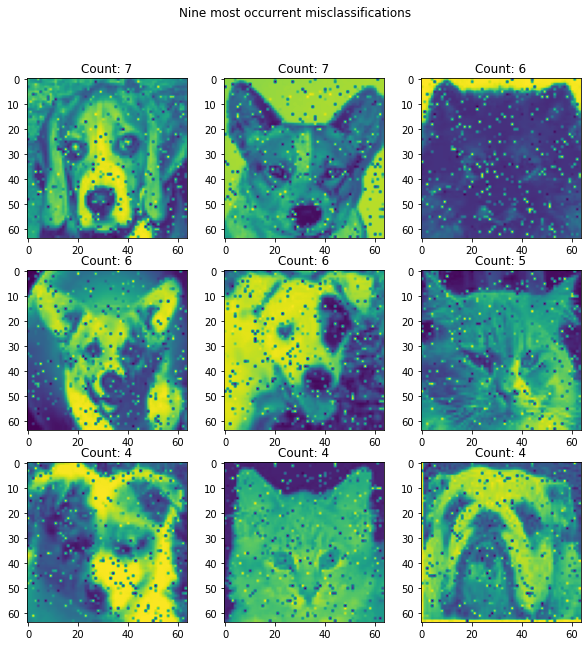

In [3859]:
random_noise_dataset = np.copy(CnD)
affected_pixels = 400
pixel_idx = random.sample(range(0, 4096), affected_pixels)
for i in range(198):
    noise = np.random.randint(0, 256, affected_pixels)
    random_noise_dataset[i][pixel_idx] = noise

random_noise_data = pd.DataFrame(data=random_noise_dataset)
labels = pd.read_csv("Labels.csv")
random_noise_data = pd.concat([random_noise_data, labels], axis=1)
# Accuracy score
wrong_pred_rand_noise = kNN_accuracy(100, 5,40,random_noise_data)
# Plot most misclassified
plot_most_misclassified(wrong_pred_rand_noise,random_noise_data)

C:\Users\gabri\AppData\Local\Temp/ipykernel_16736/2352640223.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(important_features_LinReg_400.sort_values(by='importance', ascending=True).index)


<function matplotlib.pyplot.show(close=None, block=None)>

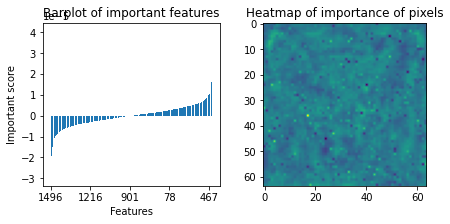

In [3624]:
X = random_noise_data.iloc[:, :-1].values
y = random_noise_data.iloc[:,4096].values

importance = 0
for i in range(10):
    model = LinearRegression()
    model.fit(X, y)
    importance += model.coef_
importance = importance/n_repetitions
important_features_LinReg_400 = pd.DataFrame(data=importance,columns=['importance'])
best_idx_LinReg = important_features_LinReg_400.sort_values(by='importance', ascending=False).index
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(7,3))
ax1.bar([x for x in range(len(importance))], np.sort(importance))
ax1.set_xlabel('Features')
ax1.set_ylabel('Important score')
ax1.set_title('Barplot of important features')
ax1.set_xticklabels(important_features_LinReg_400.sort_values(by='importance', ascending=True).index)
ax2.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_400),(64,64)),3))
ax2.set_title('Heatmap of importance of pixels')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

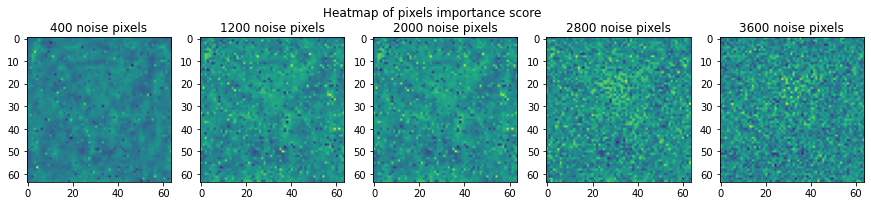

In [3621]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize=(15,3))
fig.suptitle('Heatmap of pixels importance score')
ax1.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_400),(64,64)),3))
ax1.set_title('400 noise pixels')
ax2.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_1200),(64,64)),3))
ax2.set_title('1200 noise pixels')
ax3.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_2000),(64,64)),3))
ax3.set_title('2000 noise pixels')
ax4.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_2800),(64,64)),3))
ax4.set_title('2800 noise pixels')
ax5.imshow(np.rot90(np.reshape(np.array(important_features_LinReg_3600),(64,64)),3))
ax5.set_title('3600 noise pixels')
plt.show

### e) Noisy section

Number of blocked rows  10
kNN average accuracy score [0.70625]


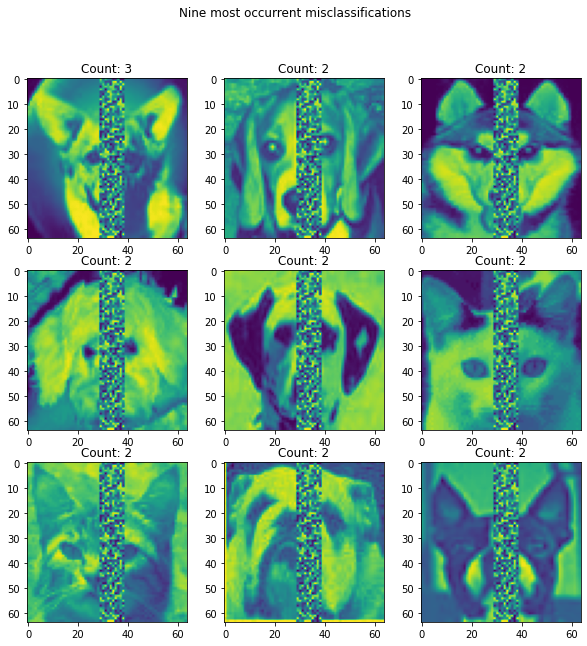

In [2942]:
noise_section_dataset = np.copy(CnD)
start_row = 25
stop_row = 35
noise = np.random.randint(0, 256, (stop_row-start_row)*64)

for i in range(198):
    noise_section_dataset[i][start_row*64:stop_row*64] = noise
noise_section_data = pd.DataFrame(data=noise_section_dataset)
labels = pd.read_csv("Labels.csv")
noise_section_data = pd.concat([noise_section_data, labels], axis=1)
print('Number of blocked rows ', stop_row-start_row)
# Accuracy score
wrong_pred_rand_noise = kNN_accuracy(100, 5,40,noise_section_data)
# Plot most misclassified
plot_most_misclassified(wrong_pred_rand_noise,noise_section_data)

### f) Pixel as observations

In [3922]:
CnD_transpose = CnD.T

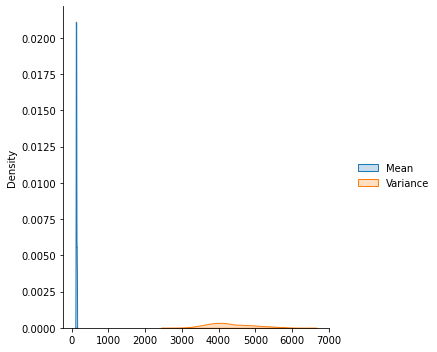

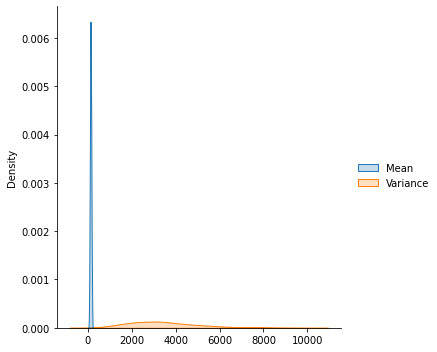

In [3923]:
scaler = StandardScaler()
dfScaledData = pd.DataFrame(scaler.fit_transform(CnD_transpose),columns = CnD_transpose.columns)
sns.displot(pd.DataFrame({'Mean': CnD.mean(), 'Variance': CnD.var()}), kind="kde", fill=True)

varFilteredData=CnD_transpose[CnD_transpose.var().sort_values()[:].index]
sns.displot(pd.DataFrame({'Mean': varFilteredData.mean(), 'Variance': varFilteredData.var()}), kind="kde", fill=True)
dfFilterAndScale = pd.DataFrame(scaler.fit_transform(varFilteredData),columns = varFilteredData.columns)

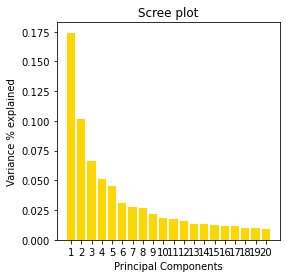

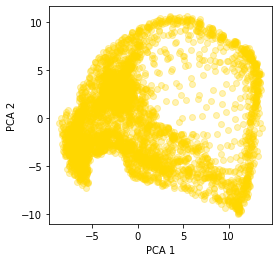

In [3924]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(dfScaledData)

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance % explained')
plt.title('Scree plot')
plt.xticks(PC)
plt.show()

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

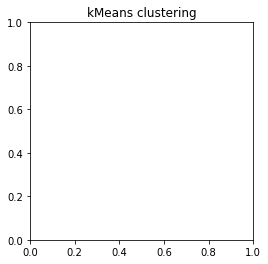

In [4054]:
#labels_kmeans = np.zeros((5,4096))
#for i in range(2,7):
model = KMeans(n_clusters=10)
model.fit(PCA_components.iloc[:,:2])
labels_kmeans[4] = model.predict(PCA_components.iloc[:,:2])

#plt.scatter(PCA_components[0], PCA_components[1], c=labels[1])
plt.title('kMeans clustering')
plt.show()

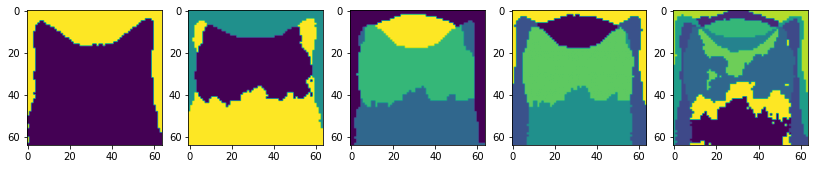

In [4055]:
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(1,5,figsize=(14,4))
ax1.imshow(np.rot90(np.reshape(labels_kmeans[0],(64,64)),3))
ax2.imshow(np.rot90(np.reshape(labels_kmeans[1],(64,64)),3))
ax3.imshow(np.rot90(np.reshape(labels_kmeans[2],(64,64)),3))
ax4.imshow(np.rot90(np.reshape(labels_kmeans[3],(64,64)),3))
ax5.imshow(np.rot90(np.reshape(labels_kmeans[4],(64,64)),3))

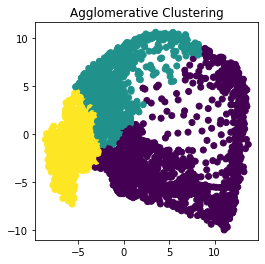

In [3994]:
#labels_agglo = np.zeros((5,4096))
#for i in [2,3,4,5,6]:
    
model = AgglomerativeClustering(n_clusters=50)
model.fit(PCA_components.iloc[:,:2])
labels_agglo[4] = model.labels_

plt.scatter(PCA_components[0], PCA_components[1], c=labels[1])
plt.title('Agglomerative Clustering')
plt.show()

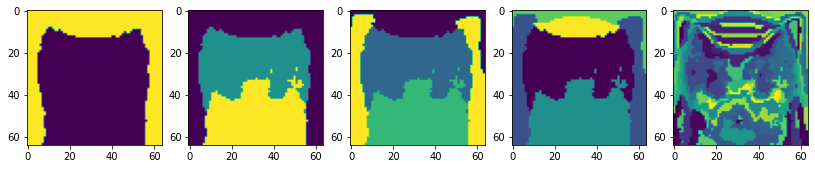

In [3995]:
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(1,5,figsize=(14,4))
ax1.imshow(np.rot90(np.reshape(labels_agglo[0],(64,64)),3))
ax2.imshow(np.rot90(np.reshape(labels_agglo[1],(64,64)),3))
ax3.imshow(np.rot90(np.reshape(labels_agglo[2],(64,64)),3))
ax4.imshow(np.rot90(np.reshape(labels_agglo[3],(64,64)),3))
ax5.imshow(np.rot90(np.reshape(labels_agglo[4],(64,64)),3))

C:\Users\gabri\anaconda3\envs\simcom\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


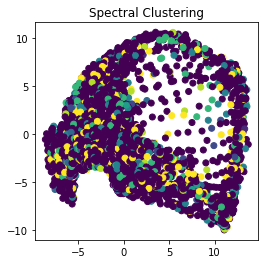

In [4048]:
X = CnD_transpose.iloc[:, :].values
clustering = SpectralClustering(n_clusters=10).fit(X)
labels_6 = clustering.labels_

plt.scatter(PCA_components[0], PCA_components[1], c=clustering.labels_)
plt.title('Spectral Clustering')
plt.show()

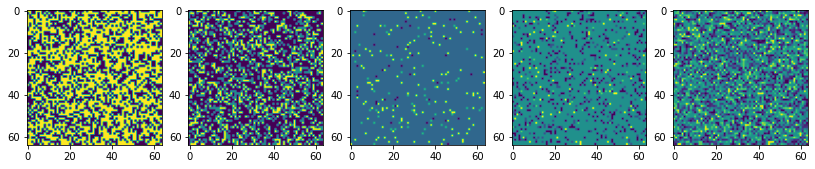

In [4006]:
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(1,5,figsize=(14,4))
ax1.imshow(np.rot90(np.reshape(labels_2,(64,64)),3))
ax2.imshow(np.rot90(np.reshape(labels_3,(64,64)),3))
ax3.imshow(np.rot90(np.reshape(labels_4,(64,64)),3))
ax4.imshow(np.rot90(np.reshape(labels_5,(64,64)),3))
ax5.imshow(np.rot90(np.reshape(labels_6,(64,64)),3))

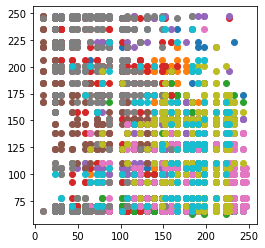

In [4047]:
X =  CnD_transpose.iloc[:, :-1].values
model = Birch(threshold=0.01, n_clusters=10)
model.fit(X)
yhat_6 = model.predict(X)
clusters = unique(yhat_6)
for cluster in clusters:
    row_ix = where(yhat_6 == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

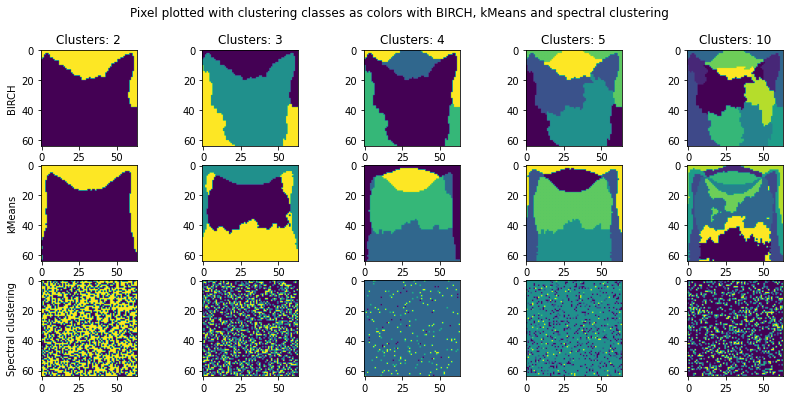

In [4058]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(14,6))
fig.suptitle('Pixel plotted with clustering classes as colors with BIRCH, kMeans and spectral clustering')
ax1.imshow(np.rot90(np.reshape(yhat_2,(64,64)),3))
ax1.set_title('Clusters: 2')
ax1.set_ylabel('BIRCH')
ax2.imshow(np.rot90(np.reshape(yhat_3,(64,64)),3))
ax2.set_title('Clusters: 3')
ax3.imshow(np.rot90(np.reshape(yhat_4,(64,64)),3))
ax3.set_title('Clusters: 4')
ax4.imshow(np.rot90(np.reshape(yhat_5,(64,64)),3))
ax4.set_title('Clusters: 5')
ax5.imshow(np.rot90(np.reshape(yhat_6,(64,64)),3))
ax5.set_title('Clusters: 10')

ax6.imshow(np.rot90(np.reshape(labels_kmeans[0],(64,64)),3))
ax6.set_ylabel('kMeans')
ax7.imshow(np.rot90(np.reshape(labels_kmeans[1],(64,64)),3))
ax8.imshow(np.rot90(np.reshape(labels_kmeans[2],(64,64)),3))
ax9.imshow(np.rot90(np.reshape(labels_kmeans[3],(64,64)),3))
ax10.imshow(np.rot90(np.reshape(labels_kmeans[4],(64,64)),3))

ax11.imshow(np.rot90(np.reshape(labels_2,(64,64)),3))
ax11.set_ylabel('Spectral clustering')
ax12.imshow(np.rot90(np.reshape(labels_3,(64,64)),3))
ax13.imshow(np.rot90(np.reshape(labels_4,(64,64)),3))
ax14.imshow(np.rot90(np.reshape(labels_5,(64,64)),3))
ax15.imshow(np.rot90(np.reshape(labels_6,(64,64)),3))

In [4022]:
CnD = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")
dataset = pd.concat([CnD, labels], axis=1)
cats, dogs = dataset[(mask:=dataset['x'] < 1)], dataset[~mask]
cats = cats.drop(['x'], axis=1)
dogs = dogs.drop(['x'], axis=1)
c_transpose = cats.T
d_transpose = dogs.T

In [4023]:
scaler = StandardScaler()
CatsScaledData = pd.DataFrame(scaler.fit_transform(c_transpose),columns = c_transpose.columns)
DogsScaledData = pd.DataFrame(scaler.fit_transform(d_transpose),columns = d_transpose.columns)
#sns.displot(pd.DataFrame({'Mean': cats.mean(), 'Variance': cats.var()}), kind="kde", fill=True)

varFilteredDataCats=c_transpose[c_transpose.var().sort_values()[:].index]
varFilteredDataDogs=d_transpose[d_transpose.var().sort_values()[:].index]
#sns.displot(pd.DataFrame({'Mean': varFilteredDataCats.mean(), 'Variance': varFilteredDataCats.var()}), kind="kde", fill=True)
CatsFilterAndScale = pd.DataFrame(scaler.fit_transform(varFilteredDataCats),columns = varFilteredDataCats.columns)
DogsFilterAndScale = pd.DataFrame(scaler.fit_transform(varFilteredDataDogs),columns = varFilteredDataDogs.columns)

In [4024]:
pca = PCA(n_components=20)
principalComponentsCats = pca.fit_transform(CatsFilterAndScale)
principalComponentsDogs = pca.fit_transform(DogsFilterAndScale)

# Putting components in a dataframe for later
PCA_components_Cats = pd.DataFrame(principalComponentsCats)
PCA_components_Dogs = pd.DataFrame(principalComponentsDogs)


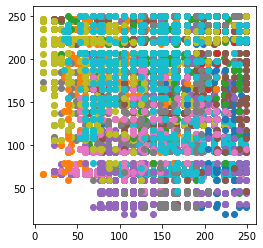

In [4041]:
X =  c_transpose.iloc[:, :-1].values
model = Birch(threshold=0.01, n_clusters=10)
model.fit(X)
yhat_cats = model.predict(X)
clusters = unique(yhat_cats)
for cluster in clusters:
    row_ix = where(yhat_cats == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
X =  d_transpose.iloc[:, :-1].values
model = Birch(threshold=0.01, n_clusters=10)
model.fit(X)
yhat_dogs = model.predict(X)
clusters = unique(yhat_dogs)
for cluster in clusters:
    row_ix = where(yhat_dogs == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()
plt.show()

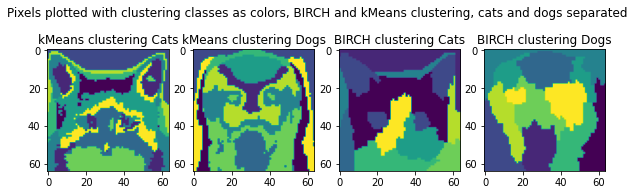

In [4064]:
model = KMeans(n_clusters=10)
# Cats
model.fit(PCA_components_Cats.iloc[:,:2])
labels_cats = model.predict(PCA_components_Cats.iloc[:,:2])

# Dogs
model.fit(PCA_components_Dogs.iloc[:,:2])
labels_dogs = model.predict(PCA_components_Dogs.iloc[:,:2])

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(10,3))
fig.suptitle('Pixels plotted with clustering classes as colors, BIRCH and kMeans clustering, cats and dogs separated')
ax1.imshow(np.rot90(np.reshape(labels_cats,(64,64)),3))
ax1.set_title('kMeans clustering Cats')
ax2.imshow(np.rot90(np.reshape(labels_dogs,(64,64)),3))
ax2.set_title('kMeans clustering Dogs')
ax3.imshow(np.rot90(np.reshape(yhat_cats,(64,64)),3))
ax3.set_title('BIRCH clustering Cats')
ax4.imshow(np.rot90(np.reshape(yhat_dogs,(64,64)),3))
ax4.set_title('BIRCH clustering Dogs')
plt.show()

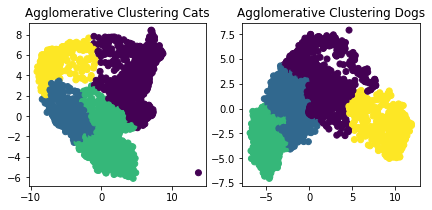

In [3019]:
model = AgglomerativeClustering(n_clusters=4)

# Cats
model.fit(PCA_components_Cats.iloc[:,:2])
labels_cats = model.labels_

# Dogs
model.fit(PCA_components_Dogs.iloc[:,:2])
labels_dogs = model.labels_

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(7,3))
ax1.scatter(PCA_components_Cats[0], PCA_components_Cats[1], c=labels_cats)
ax1.set_title('Agglomerative Clustering Cats')
ax2.scatter(PCA_components_Dogs[0], PCA_components_Dogs[1], c=labels_dogs)
ax2.set_title('Agglomerative Clustering Dogs')
plt.show()

C:\Users\gabri\anaconda3\envs\simcom\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\gabri\anaconda3\envs\simcom\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


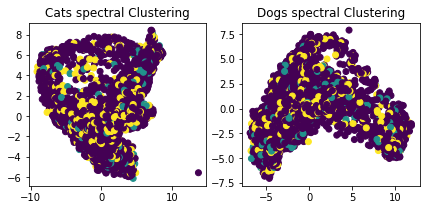

In [3015]:
X = c_transpose.iloc[:, :].values
clustering = SpectralClustering(n_clusters=3).fit(X)
clustering.labels_

Y = d_transpose.iloc[:, :].values
clustering = SpectralClustering(n_clusters=3).fit(Y)
clustering.labels_

fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(7,3))
ax1.scatter(PCA_components_Cats[0], PCA_components_Cats[1], c=clustering.labels_)
ax1.set_title('Cats spectral Clustering')

ax2.scatter(PCA_components_Dogs[0], PCA_components_Dogs[1], c=clustering.labels_)
ax2.set_title('Dogs spectral Clustering')
plt.show()

# :)